In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [1]:
from utilities.load_controller import get_reads
from utilities.load_controller import get_matching_reads
from utilities.load_controller import get_outlying_reads

from utilities.label_controller import get_labelled_data
from utilities.label_controller import get_labelled_data_with_reads
from utilities.label_controller import get_labelled_data_with_matched_reads
from utilities.label_controller import vizualize_ohe_labels

from matplotlib import pyplot as plt

In [9]:
#Getting reads from file(s)
f_mapped = "./utilities/mapped.hdf5"
f_unmapped = "./utilities/unmapped.hdf5"

#1 - Getting reads from a single file
#Returns: [Read1, Read2, ...]
reads1 = get_reads(f_mapped)

#2 - Getting matching reads from 2 files
#Returns - [
#           {matched:[[File1_Read1, File2_Read1], [File1_Read2,File2_Read2], ...]}
#           {outliers:[Read1, Read2, ...]}
#          ]
reads2 = get_reads(f_mapped, f_unmapped)
matched = reads2['matched']
outliers = reads2['outliers']

#3 - Getting mathicng reads from 2 files
#Returns: [[File1_Read1, File2_Read1], [File1_Read2,File2_Read2], ...]
reads3 = get_matching_reads(f_mapped, f_unmapped)

#4 - Getting outlying reads from 2 files
#Returns: [Read1, Read2, ...]
reads4 = get_outlying_reads(f_mapped, f_unmapped)

In [5]:
# Getting labels - Full workflow
# with_signal_barcode_prefix = Keep the part of the signal where there are not labels, mark it -2
# with_barcode_prefix = Keep the part of the signal NOT matched to reference (bar code), mark it -1

f_mapped = "./utilities/mapped.hdf5"
f_unmapped = "./utilities/unmapped.hdf5"

# 1 - Get labels combining MAPPED / NOT MAPPED files
# 1-A With file names
labels_1a = get_labelled_data(f_mapped, f_unmapped)
print("1A")
print(labels_1a[0]['data'][10:12])

# 1-B With reads
print("1B")
reads1 = get_matching_reads(f_mapped, f_unmapped)
labels_1b = get_labelled_data_with_matched_reads(reads1)
print(labels_1a[0]['data'][10:12])

# 2 - Get labels from a signle file (Can be MAPPED or UNMAPPED), WITHOUT combining
# 2-A With file names == 1-A
labels_2a = get_labelled_data(f_mapped)
print("2A")
print(labels_1a[0]['data'][10:12])

# 2-B With reads
reads2 = get_reads(f_mapped)
labels_2b = get_labelled_data_with_reads(reads2)
print("2B")
print(labels_1a[0]['data'][10:12])

1A
[{'base': 3, 'measurements': array([0.43676223, 0.43338954, 0.44182125, 0.45151771]), 'measurements_size': 4}, {'base': 3, 'measurements': array([0.44856661, 0.52403035, 0.52993255, 0.53752108, 0.53499157,
       0.52993255, 0.53920742, 0.5341484 ]), 'measurements_size': 8}]
1B
[{'base': 3, 'measurements': array([0.43676223, 0.43338954, 0.44182125, 0.45151771]), 'measurements_size': 4}, {'base': 3, 'measurements': array([0.44856661, 0.52403035, 0.52993255, 0.53752108, 0.53499157,
       0.52993255, 0.53920742, 0.5341484 ]), 'measurements_size': 8}]
2A
[{'base': 3, 'measurements': array([0.43676223, 0.43338954, 0.44182125, 0.45151771]), 'measurements_size': 4}, {'base': 3, 'measurements': array([0.44856661, 0.52403035, 0.52993255, 0.53752108, 0.53499157,
       0.52993255, 0.53920742, 0.5341484 ]), 'measurements_size': 8}]
2B
[{'base': 3, 'measurements': array([0.43676223, 0.43338954, 0.44182125, 0.45151771]), 'measurements_size': 4}, {'base': 3, 'measurements': array([0.44856661, 0.

002d4025-4323-4b2d-81c1-6a99fc1db5e1


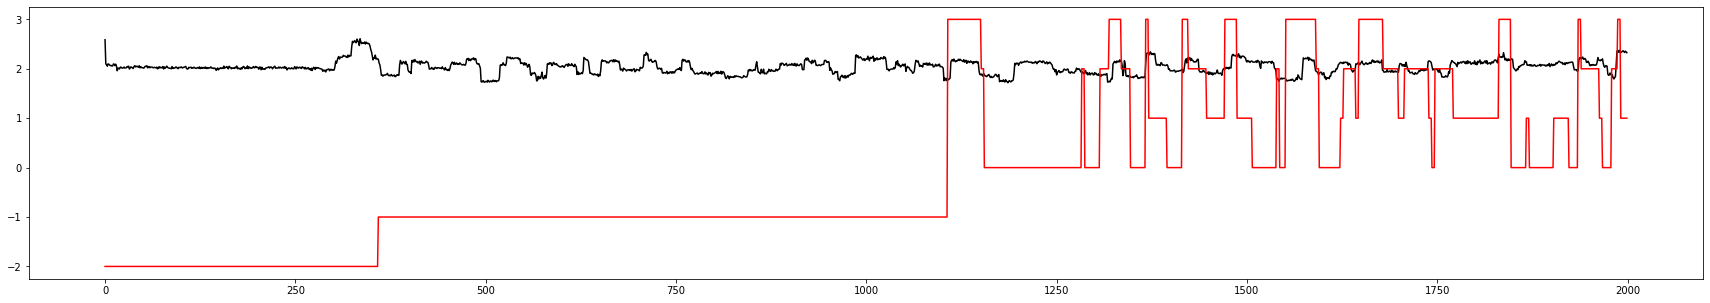

002d4025-4323-4b2d-81c1-6a99fc1db5e1


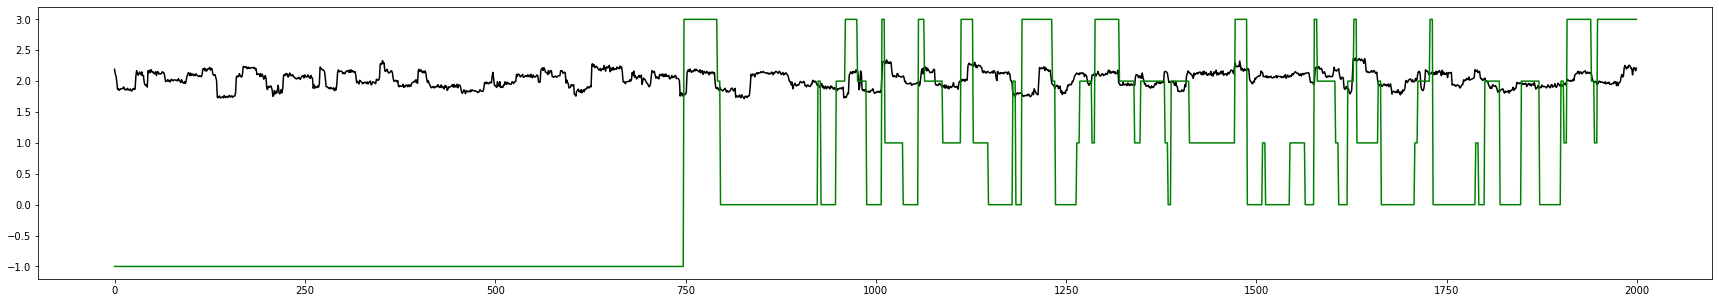

002d4025-4323-4b2d-81c1-6a99fc1db5e1


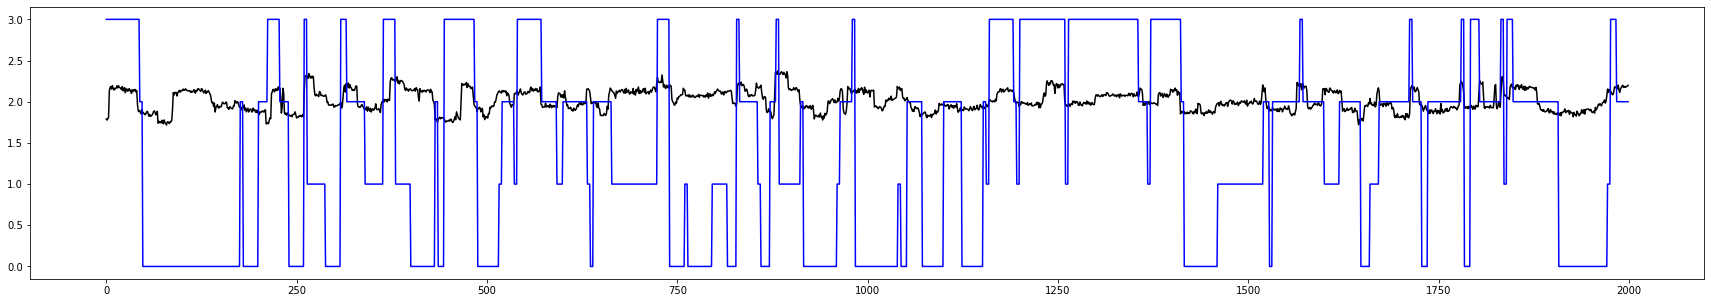

014e9cb2-2966-458c-b7be-d1bd575b6028


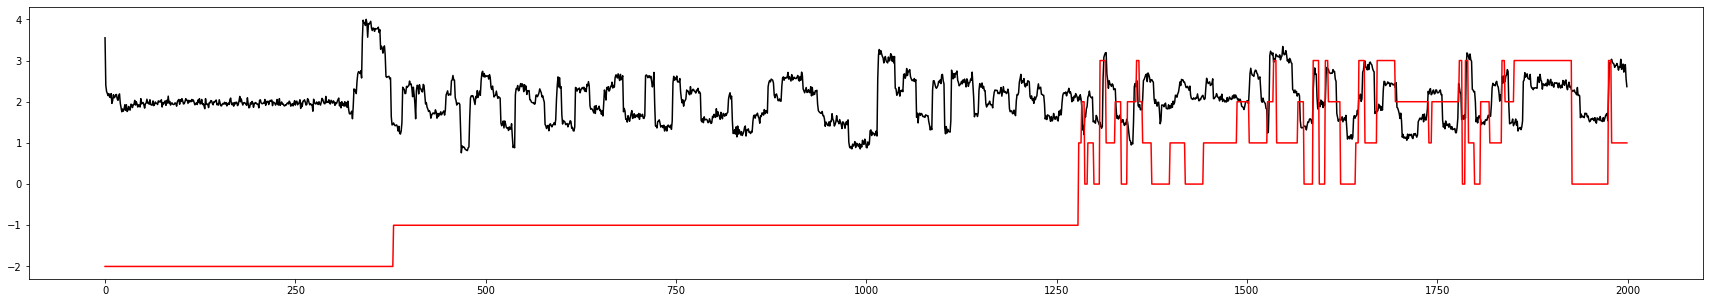

014e9cb2-2966-458c-b7be-d1bd575b6028


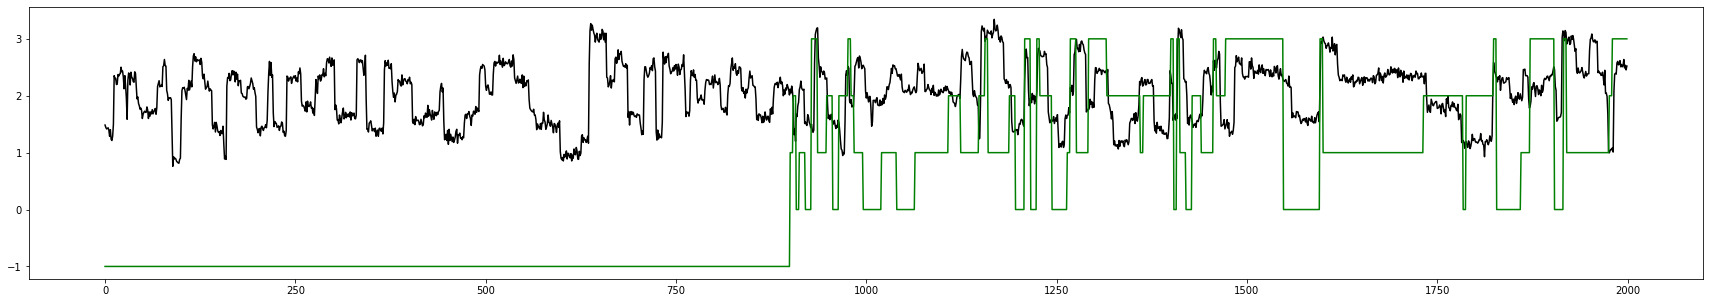

014e9cb2-2966-458c-b7be-d1bd575b6028


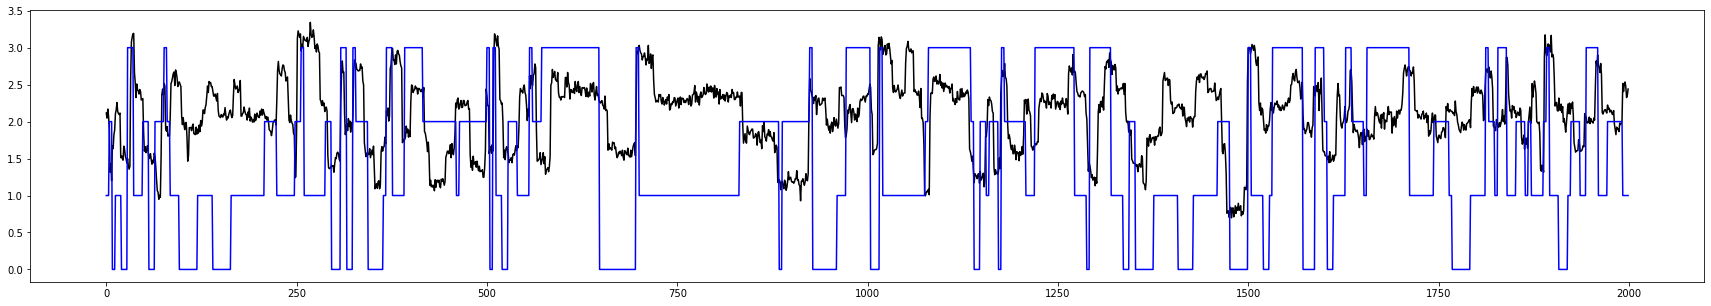

01540f95-f353-46ec-ba18-bc881c171fa0


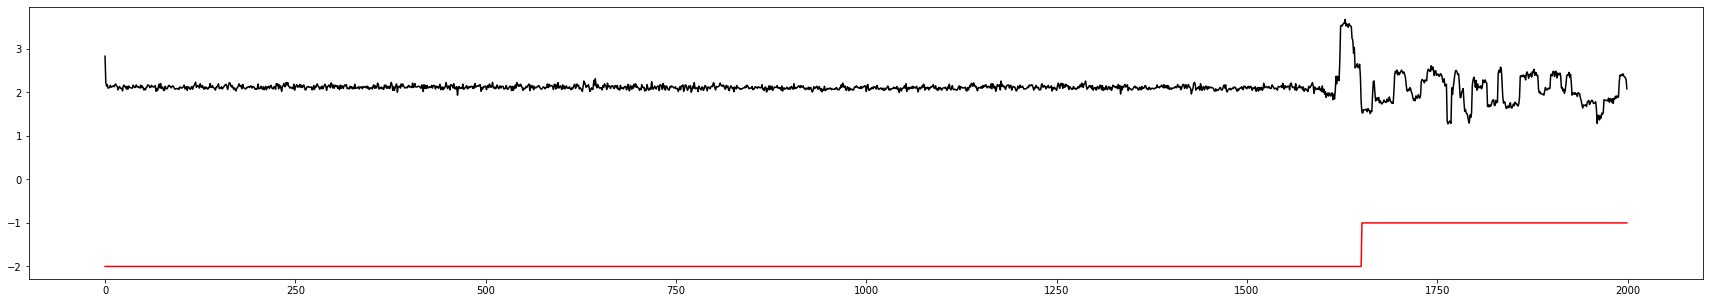

01540f95-f353-46ec-ba18-bc881c171fa0


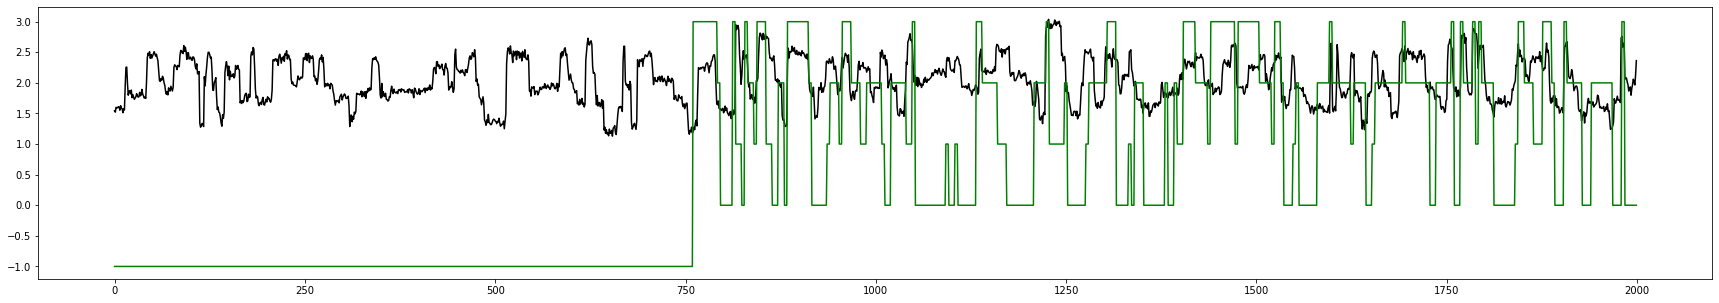

01540f95-f353-46ec-ba18-bc881c171fa0


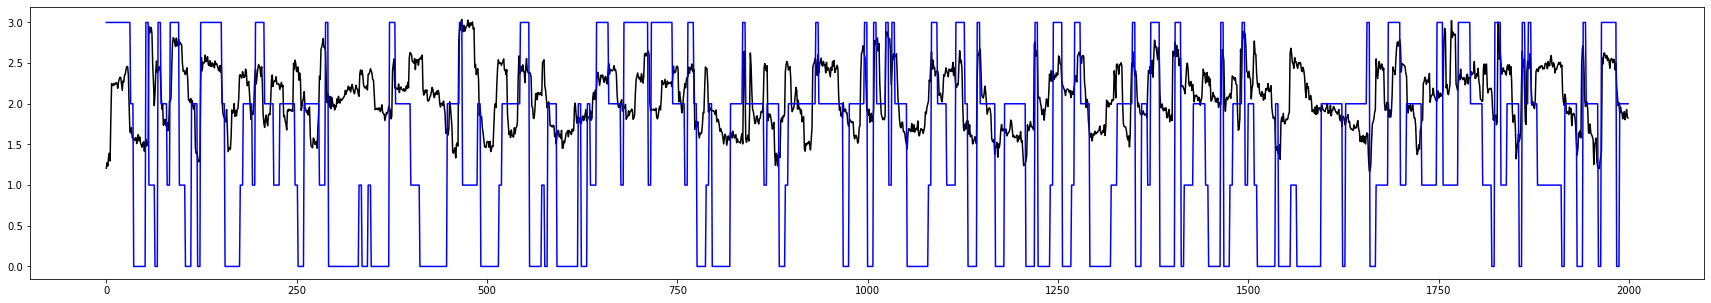

In [11]:
def plot(read, color):
    print(read['uid'])
    plt.figure(figsize=(30,5))
    plt.plot(read['measurements'][0:2000]*4, 'k', label="raw")
    plt.plot(read['labels'][0:2000], color, label="base")
    plt.show()

#Vizualizing prefixes
f_mapped = "./utilities/mapped.hdf5"
f_unmapped = "./utilities/unmapped.hdf5"
reads = get_matching_reads(f_mapped, f_unmapped)

#Matching allowes to have 2 levels of prefexes:
data1 = vizualize_ohe_labels(reads[:3], True, True)
data2 = vizualize_ohe_labels(reads[:3], True, False)
data3 = vizualize_ohe_labels(reads[:3], False, False)

for i in range(3):
    plot(data1[i], 'r')
    plot(data2[i], 'g')
    plot(data3[i], 'b')